In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
offers = pd.read_csv("offerEvents.csv")
applications = pd.read_csv("applicationEvents.csv")
applications.head()

,case,event,startTime,completeTime,LoanGoal,ApplicationType,RequestedAmount,Action,FirstWithdrawalAmount,NumberOfTerms,Accepted,OfferID,MonthlyCost,EventOrigin,EventID,Selected,CreditScore,OfferedAmount
0,Application_652823628,A_Create Application,2016/01/01 10:51:15.304,2016/01/01 10:51:15.304,Existing loan takeover,New credit,20000.0,Created,NaN,NaN,NaN,NaN,NaN,Application,Application_652823628,NaN,NaN,NaN
1,Application_652823628,A_Submitted,2016/01/01 10:51:15.352,2016/01/01 10:51:15.352,Existing loan takeover,New credit,20000.0,statechange,NaN,NaN,NaN,NaN,NaN,Application,ApplState_1582051990,NaN,NaN,NaN
2,Application_652823628,A_Submitted,2016/01/01 10:51:15.352,2016/01/01 10:51:15.352,Existing loan takeover,New credit,20000.0,statechange,NaN,NaN,NaN,NaN,NaN,Application,ApplState_1582051990,NaN,NaN,NaN
3,Application_652823628,A_Submitted,2016/01/01 10:51:15.352,2016/01/01 10:51:15.352,Existing loan takeover,New credit,20000.0,statechange,NaN,NaN,NaN,NaN,NaN,Application,ApplState_1582051990,NaN,NaN,NaN
4,Application_652823628,A_Submitted,2016/01/01 10:51:15.352,2016/01/01 10:51:15.352,Existing loan takeover,New credit,20000.0,statechange,NaN,NaN,NaN,NaN,NaN,Application,ApplState_1582051990,NaN,NaN,NaN


In [3]:
#uniqueApplications = applications.case.unique()
countEvents = applications.groupby(['case', 'event']).size()
countEvents.head()

case                    event               
Application_1000086665  A_Accepted              1
                        A_Cancelled             1
                        A_Complete              4
                        A_Concept               1
                        A_Create Application    1
dtype: int64

In [4]:
eventsPerApp = countEvents.to_frame(name = "occurences").reset_index()
eventsPerApp.head()

,case,event,occurences
0,Application_1000086665,A_Accepted,1
1,Application_1000086665,A_Cancelled,1
2,Application_1000086665,A_Complete,4
3,Application_1000086665,A_Concept,1
4,Application_1000086665,A_Create Application,1


In [5]:
incompleteApps = eventsPerApp[eventsPerApp.event =='A_Incomplete'].reset_index()
incompleteApps.head()

,index,case,event,occurences
0,43,Application_1000334415,A_Incomplete,6
1,59,Application_1000339879,A_Incomplete,4
2,76,Application_100034150,A_Incomplete,8
3,94,Application_1000386745,A_Incomplete,10
4,151,Application_1000610355,A_Incomplete,10


In [6]:
endApps = eventsPerApp.loc[(eventsPerApp.event =='A_Pending') 
                       | (eventsPerApp.event =='A_Cancelled') | (eventsPerApp.event =='A_Denied')].reset_index()
endApps.head()

,index,case,event,occurences
0,1,Application_1000086665,A_Cancelled,1
1,16,Application_1000158214,A_Pending,2
2,28,Application_1000311556,A_Cancelled,1
3,42,Application_1000334415,A_Denied,1
4,60,Application_1000339879,A_Pending,2


In [7]:
apps = incompleteApps[['case']]
apps2 = endApps[['case']]
allApps = pd.concat([apps, apps2])
allApps = allApps.drop_duplicates()
allApps.shape

(31456, 1)

In [8]:
allApps['incompleteFrequency'] = 0
allApps['cancelled'] = False
allApps['pending'] = False
allApps['denied'] = False
allApps.shape

(31456, 5)

In [9]:
allApps = pd.merge(allApps, endApps)
allApps.pending = allApps.event == 'A_Pending'
allApps.cancelled = allApps.event == 'A_Cancelled'
allApps.denied = allApps.event == 'A_Denied'
allApps.head()

,case,incompleteFrequency,cancelled,pending,denied,index,event,occurences
0,Application_1000334415,0,False,False,True,42,A_Denied,1
1,Application_1000339879,0,False,True,False,60,A_Pending,2
2,Application_100034150,0,False,True,False,77,A_Pending,2
3,Application_1000386745,0,False,True,False,95,A_Pending,2
4,Application_1000610355,0,False,False,True,150,A_Denied,1


In [10]:
allApps.incompleteFrequency = incompleteApps.occurences
allApps.incompleteFrequency.fillna(0, inplace=True)
allApps.head()

,case,incompleteFrequency,cancelled,pending,denied,index,event,occurences
0,Application_1000334415,6.0,False,False,True,42,A_Denied,1
1,Application_1000339879,4.0,False,True,False,60,A_Pending,2
2,Application_100034150,8.0,False,True,False,77,A_Pending,2
3,Application_1000386745,10.0,False,True,False,95,A_Pending,2
4,Application_1000610355,10.0,False,False,True,150,A_Denied,1


In [11]:
del allApps['occurences']
del allApps['event']
del allApps['index']

In [12]:
allApps.head()

,case,incompleteFrequency,cancelled,pending,denied
0,Application_1000334415,6.0,False,False,True
1,Application_1000339879,4.0,False,True,False
2,Application_100034150,8.0,False,True,False
3,Application_1000386745,10.0,False,True,False
4,Application_1000610355,10.0,False,False,True


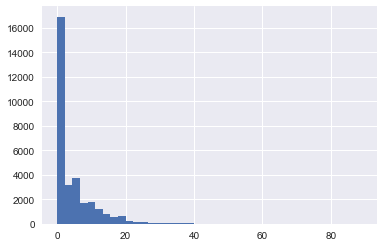

In [13]:
allApps.incompleteFrequency.hist(normed = 0, histtype = "stepfilled", bins = 40)

In [14]:
#allApps[['incompleteFrequency']]  = allApps[['incompleteFrequency']].apply(lambda x: (x - x.min()) / (x.max() - x.min())) # normalize
#allApps.head()

In [15]:
incFreq = tf.feature_column.numeric_column('incompleteFrequency')

In [16]:
allApps['loanGoal'] = applications.LoanGoal
allApps['applicationType'] = applications.ApplicationType
allApps

,case,incompleteFrequency,cancelled,pending,denied,loanGoal,applicationType
0,Application_1000334415,6.0,False,False,True,Existing loan takeover,New credit
1,Application_1000339879,4.0,False,True,False,Existing loan takeover,New credit
2,Application_100034150,8.0,False,True,False,Existing loan takeover,New credit
3,Application_1000386745,10.0,False,True,False,Existing loan takeover,New credit
4,Application_1000610355,10.0,False,False,True,Existing loan takeover,New credit
5,Application_1000671285,6.0,False,True,False,Existing loan takeover,New credit
6,Application_1000956993,10.0,False,True,False,Existing loan takeover,New credit
7,Application_1001114274,4.0,False,True,False,Existing loan takeover,New credit
8,Application_1001177986,22.0,False,True,False,Existing loan takeover,New credit
9,Application_1001274919,4.0,False,True,False,Existing loan takeover,New credit


In [17]:
allApps.loanGoal.unique()

array(['Existing loan takeover', 'Home improvement', 'Car',
       'Other, see explanation', 'Remaining debt home', 'Not speficied',
       'Unknown', 'Caravan / Camper', 'Tax payments',
       'Extra spending limit', 'Motorcycle', 'Boat', 'Business goal'], dtype=object)

In [18]:
allApps.applicationType.unique()

array(['New credit', 'Limit raise'], dtype=object)

In [19]:
loanGoal = tf.feature_column.categorical_column_with_vocabulary_list('loanGoal',
                                                                           ['Existing loan takeover',
                                                                            'Home improvement', 'Car',
                                                                            'Other, see explanation',
                                                                            'Remaining debt home', 'Not speficied',
                                                                            'Unknown', 'Caravan / Camper', 'Tax payments',
                                                                            'Extra spending limit', 'Motorcycle', 'Boat',
                                                                            'Business goal'])
applicationType = tf.feature_column.categorical_column_with_vocabulary_list('applicationType',
                                                                           ['New credit', 'Limit raise'])

In [20]:
feat_cols = [incFreq, loanGoal, applicationType]

In [21]:
allApps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31411 entries, 0 to 31410
Data columns (total 7 columns):
case                   31411 non-null object
incompleteFrequency    31411 non-null float64
cancelled              31411 non-null bool
pending                31411 non-null bool
denied                 31411 non-null bool
loanGoal               31411 non-null object
applicationType        31411 non-null object
dtypes: bool(3), float64(1), object(3)
memory usage: 1.3+ MB


In [22]:
feat_data = allApps.drop('pending', axis = 1)

In [23]:
labels = allApps['pending']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(feat_data, labels, test_size = 0.3)

In [25]:
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train, y = y_train, batch_size=100, num_epochs=1000, shuffle=True)

In [26]:
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\s158881\\AppData\\Local\\Temp\\tmpbxkxoc1j', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [27]:
model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\s158881\AppData\Local\Temp\tmpbxkxoc1j\model.ckpt.
INFO:tensorflow:loss = 69.3147, step = 1
INFO:tensorflow:global_step/sec: 499.65
INFO:tensorflow:loss = 56.4306, step = 101 (0.203 sec)
INFO:tensorflow:global_step/sec: 558.268
INFO:tensorflow:loss = 72.6502, step = 201 (0.178 sec)
INFO:tensorflow:global_step/sec: 569.401
INFO:tensorflow:loss = 56.857, step = 301 (0.176 sec)
INFO:tensorflow:global_step/sec: 576.145
INFO:tensorflow:loss = 52.5251, step = 401 (0.174 sec)
INFO:tensorflow:global_step/sec: 562.986
INFO:tensorflow:loss = 51.3871, step = 501 (0.178 sec)
INFO:tensorflow:global_step/sec: 567.782
INFO:tensorflow:loss = 49.8383, step = 601 (0.176 sec)
INFO:tensorflow:global_step/sec: 576.89
INFO:tensorflow:loss = 62.843, step = 701 (0.173 sec)
INFO:tensorflow:global_step/sec: 579.306
INFO:tensorflow:loss = 48.7205, step = 801 (0.172 sec)
INFO:tensorflow:global_step/sec: 557.701
INFO

In [28]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x = x_test,
      y = y_test,
      batch_size = 100,
      num_epochs = 1,
      shuffle = False)

In [29]:
results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Starting evaluation at 2017-11-23-10:00:40
INFO:tensorflow:Restoring parameters from C:\Users\s158881\AppData\Local\Temp\tmpbxkxoc1j\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-23-10:00:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.775785, accuracy_baseline = 0.552525, auc = 0.791939, auc_precision_recall = 0.806018, average_loss = 0.57118, global_step = 1000, label/mean = 0.552525, loss = 56.6611, prediction/mean = 0.559934


{'accuracy': 0.77578521,
 'accuracy_baseline': 0.55252546,
 'auc': 0.79193878,
 'auc_precision_recall': 0.80601835,
 'average_loss': 0.57118005,
 'global_step': 1000,
 'label/mean': 0.55252546,
 'loss': 56.66106,
 'prediction/mean': 0.55993354}